# Data set : https://www.kaggle.com/datasets/ealtman2019/credit-card-transactions/data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier

# Read the Dataset

In [3]:
# Loading the data
df = pd.read_csv('ccfd.csv')
df

,User,Card,Year,Month,Day,Amount,UseChip,MerchantName,MerchantCity,MerchantCountry,Zip,MCC,IssFraud?
0,1,1,2005,9,6,$16.68,Swipe Transaction,Ross Package Store,Berkley,USA,48072.0,5921,No
1,1,1,2005,9,9,$224.70,Online Transaction,Digital Delivery Company 7,San Jose,NaN,NaN,4899,No
2,1,1,2005,9,9,$145.61,Online Transaction,Travel Booking Company 4,San Jose,NaN,NaN,4722,No
3,1,1,2005,9,9,$229.21,Swipe Transaction,Car Rental Company 4,Belleville,USA,48111.0,3405,No
4,1,1,2005,9,9,$11.00,Swipe Transaction,Supermarket Chain 3,Southfield,USA,48075.0,5411,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
691915,1999,4,2019,4,13,$52.42,Chip Transaction,Wright Beauticians,East Elmhurst,USA,11370.0,7230,No
691916,1999,4,2019,4,15,$7.57,Chip Transaction,Bookstore Company 1,Elmhurst,USA,11373.0,5942,No
691917,1999,4,2019,4,15,$7.27,Chip Transaction,Supermarket Chain 1,Elmhurst,USA,11373.0,5411,No
691918,1999,4,2019,4,17,$5.39,Chip Transaction,Acme Souvenirs,East Elmhurst,USA,11370.0,5947,No


In [4]:
#User- column for user id details
#Card-Column for card number
#Year- column for year of transaction
#Month-column for month of transaction
#Day-column for Day of transaction
#Amount-for how much amount transacted 
#Use Chip-for transaction is based on online or swipe transaction
#Merchant name- Name of the merchant in the transaction
#Merchant city-Merchant city name in the transaction
#Merchant state-Merchant state name in the transaction
#Zip-Postal code of the merchant area
#MCC-It is a four number pin given by bank for each card
df.columns

Index(['User', 'Card', 'Year', 'Month', 'Day', 'Amount', 'UseChip',
       'MerchantName', 'MerchantCity', 'MerchantCountry', 'Zip', 'MCC',
       'IssFraud?'],
      dtype='object')

# Check Null values

In [5]:
df.isnull().sum()

User                   0
Card                   0
Year                   0
Month                  0
Day                    0
Amount                 0
UseChip                0
MerchantName           0
MerchantCity           0
MerchantCountry    73784
Zip                77856
MCC                    0
IssFraud?              0
dtype: int64

In [6]:
df.head()

,User,Card,Year,Month,Day,Amount,UseChip,MerchantName,MerchantCity,MerchantCountry,Zip,MCC,IssFraud?
0,1,1,2005,9,6,$16.68,Swipe Transaction,Ross Package Store,Berkley,USA,48072.0,5921,No
1,1,1,2005,9,9,$224.70,Online Transaction,Digital Delivery Company 7,San Jose,NaN,NaN,4899,No
2,1,1,2005,9,9,$145.61,Online Transaction,Travel Booking Company 4,San Jose,NaN,NaN,4722,No
3,1,1,2005,9,9,$229.21,Swipe Transaction,Car Rental Company 4,Belleville,USA,48111.0,3405,No
4,1,1,2005,9,9,$11.00,Swipe Transaction,Supermarket Chain 3,Southfield,USA,48075.0,5411,No


# Check balanced data or imbalanced data

In [7]:
df['IssFraud?'].value_counts()

No     691048
Yes       872
Name: IssFraud?, dtype: int64

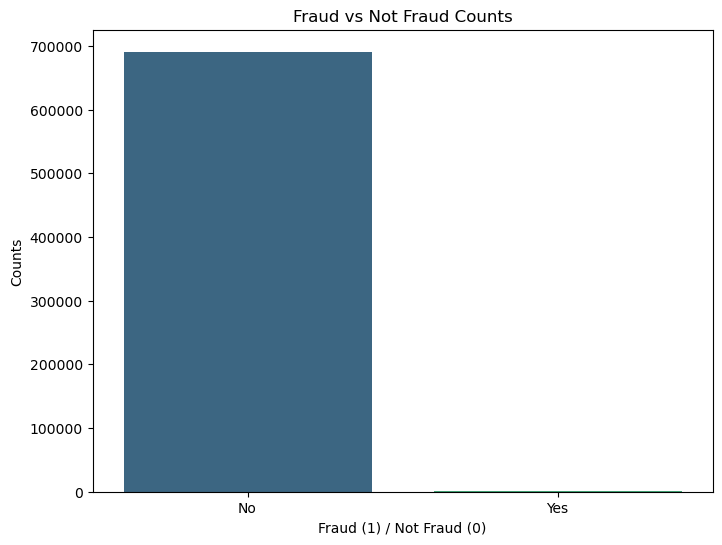

In [8]:
# Plot the value counts using Seaborn
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='IssFraud?', palette='viridis')
plt.title('Fraud vs Not Fraud Counts')
plt.xlabel('Fraud (1) / Not Fraud (0)')
plt.ylabel('Counts')
plt.show()

# Data preprocessing

# split the numerical and categorical values

In [9]:
def quanQual(df):
    quan=[]
    qual=[]
    for columnName in df.columns:
    #print(columnName)
        if(df[columnName].dtypes=='O'):
        #print("qual")
            qual.append(columnName)
        else:
        #print("quan")
             quan.append(columnName)
    return quan,qual

In [10]:
quan,qual=quanQual(df)

In [11]:
quan

['User', 'Card', 'Year', 'Month', 'Day', 'Zip', 'MCC']

In [12]:
qual

['Amount',
 'UseChip',
 'MerchantName',
 'MerchantCity',
 'MerchantCountry',
 'IssFraud?']

# handling missing data

In [13]:
import numpy as np
from sklearn.impute import SimpleImputer

# Create the imputer instance
imp = SimpleImputer(missing_values=np.nan, strategy='mean', copy=True)

# Fit the imputer to the data
imp.fit(df[quan])

datan=imp.transform(df[quan])

In [14]:
datan

array([[1.00000000e+00, 1.00000000e+00, 2.00500000e+03, ...,
        6.00000000e+00, 4.80720000e+04, 5.92100000e+03],
       [1.00000000e+00, 1.00000000e+00, 2.00500000e+03, ...,
        9.00000000e+00, 5.16946769e+04, 4.89900000e+03],
       [1.00000000e+00, 1.00000000e+00, 2.00500000e+03, ...,
        9.00000000e+00, 5.16946769e+04, 4.72200000e+03],
       ...,
       [1.99900000e+03, 4.00000000e+00, 2.01900000e+03, ...,
        1.50000000e+01, 1.13730000e+04, 5.41100000e+03],
       [1.99900000e+03, 4.00000000e+00, 2.01900000e+03, ...,
        1.70000000e+01, 1.13700000e+04, 5.94700000e+03],
       [1.99900000e+03, 4.00000000e+00, 2.01900000e+03, ...,
        2.40000000e+01, 1.13700000e+04, 7.54200000e+03]])

In [15]:
datan=pd.DataFrame(datan,columns=quan)

In [16]:
import numpy as np
from sklearn.impute import SimpleImputer

# Create the imputer instance
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Fit the imputer to the data
imp.fit(df[qual])

datal=imp.transform(df[qual])

In [17]:
datal

array([['$16.68', 'Swipe Transaction', 'Ross Package Store', 'Berkley',
        'USA', 'No'],
       ['$224.70', 'Online Transaction', 'Digital Delivery Company 7',
        'San Jose ', 'USA', 'No'],
       ['$145.61', 'Online Transaction', 'Travel Booking Company 4',
        'San Jose ', 'USA', 'No'],
       ...,
       ['$7.27', 'Chip Transaction', 'Supermarket Chain 1', 'Elmhurst',
        'USA', 'No'],
       ['$5.39', 'Chip Transaction', 'Acme Souvenirs', 'East Elmhurst',
        'USA', 'No'],
       ['$15.59', 'Chip Transaction', 'Fox East Elmhurst Car Cleaners',
        'East Elmhurst', 'USA', 'No']], dtype=object)

In [18]:
datal=pd.DataFrame(datal,columns=qual)

In [19]:
df=pd.concat([datan,datal],axis=1)

# Now we saved the data as Preprocessed_credit_card_detection.csv

In [20]:
csv=df.to_csv("Preprocessed_credit_card_detection.csv",index=False)

In [21]:
csv